In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
from librosa import load, logamplitude
from librosa.feature import melspectrogram
from tqdm import tqdm_notebook
import pickle
from scipy.io.wavfile import read, write

In [2]:
def get_spectrogram(path):
    """Строим спектограмму из wav файла"""
    y, sr = load(path)
    S = melspectrogram(y, sr=sr, n_fft=512, hop_length=128, n_mels=150)
    log_S = logamplitude(S, ref_power=np.max)
    return log_S

def get_spectrogram_1(x):
#   Отправляем путь к файлу в get_spectrogram()
    i, x = x
    if i % 1000 == 0:
        print(i)
    return get_spectrogram(x)

In [3]:
filesNames = os.listdir("../wav_rc2/")
specs = []
for i in tqdm_notebook(range(len(filesNames))):
    specs.append([filesNames[i], get_spectrogram("../wav_rc2/" + filesNames[i])])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [4]:
notes = []
for fname in filesNames:
    notes.append(read("../wav_rc2/" + fname))

In [13]:
for i in tqdm_notebook(range(len(specs))):
    means = [np.mean(specs[i][1][:, j]) for j in range(len(specs[i][1][0]))]
    maximum = np.argmax([means[j] - means[j-1] for j in range(1, len(means))])
    cut_here = np.max([0, maximum - 5])
    proportion = len(notes[i][1])//len(specs[i][1][0])
    write('../wav_rc2_cut/' + filesNames[i], 44100, notes[i][1][cut_here*proportion:])

Widget Javascript not detected.  It may not be installed properly. Did you enable the widgetsnbextension? If not, then run "jupyter nbextension enable --py --sys-prefix widgetsnbextension"


In [20]:
spec_before = specs[10][1]
spec_after = get_spectrogram("../wav_rc2_cut/" + filesNames[10])

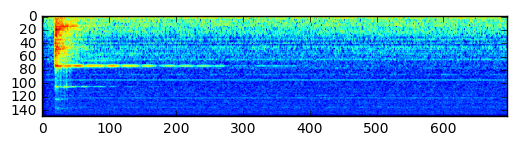

In [21]:
plt.imshow(spec_before)

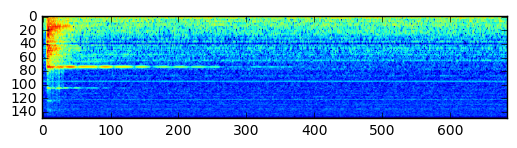

In [22]:
plt.imshow(spec_after)